In [1]:
# Imports
from tensorflow import keras 
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("tableau-colorblind10")

%matplotlib inline
import os 
from datetime import datetime

In [2]:
import yfinance as yf

data = yf.download("MSFT", start="2018-01-01", end="2025-07-01")
print(data.head())

C:\Users\VINAMRATA CHHONKAR\AppData\Local\Temp\ipykernel_31160\1470911491.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("MSFT", start="2018-01-01", end="2025-07-01")
[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open    Volume
Ticker           MSFT       MSFT       MSFT       MSFT      MSFT
Date                                                            
2018-01-02  79.328522  79.660788  78.913192  79.494655  22483800
2018-01-03  79.697701  79.845378  79.346978  79.430041  26061400
2018-01-04  80.399155  80.906786  79.900755  79.919211  21912000
2018-01-05  81.395966  81.599018  80.694513  80.906797  23407100
2018-01-08  81.479019  81.755910  80.851405  81.405181  22113000


In [3]:
# Flatten column MultiIndex
data.columns = data.columns.get_level_values(0)


data.columns = [col.lower() for col in data.columns]
print(data.head())
data=data.reset_index()

                close       high        low       open    volume
Date                                                            
2018-01-02  79.328522  79.660788  78.913192  79.494655  22483800
2018-01-03  79.697701  79.845378  79.346978  79.430041  26061400
2018-01-04  80.399155  80.906786  79.900755  79.919211  21912000
2018-01-05  81.395966  81.599018  80.694513  80.906797  23407100
2018-01-08  81.479019  81.755910  80.851405  81.405181  22113000


In [4]:
data.rename(columns={'Date': 'date'}, inplace=True)
data

,date,close,high,low,open,volume
0,2018-01-02,79.328522,79.660788,78.913192,79.494655,22483800
1,2018-01-03,79.697701,79.845378,79.346978,79.430041,26061400
2,2018-01-04,80.399155,80.906786,79.900755,79.919211,21912000
3,2018-01-05,81.395966,81.599018,80.694513,80.906797,23407100
4,2018-01-08,81.479019,81.755910,80.851405,81.405181,22113000
...,...,...,...,...,...,...
1878,2025-06-24,490.109985,491.850006,486.799988,488.950012,22305600
1879,2025-06-25,492.269989,494.559998,489.390015,492.040009,17495100
1880,2025-06-26,497.450012,498.040009,492.809998,492.980011,21578900
1881,2025-06-27,495.940002,499.299988,493.029999,497.549988,34539200


In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1883 entries, 0 to 1882
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1883 non-null   datetime64[ns]
 1   close   1883 non-null   float64       
 2   high    1883 non-null   float64       
 3   low     1883 non-null   float64       
 4   open    1883 non-null   float64       
 5   volume  1883 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 88.4 KB
None


In [6]:
print(data.describe())

                                date        close         high          low  \
count                           1883  1883.000000  1883.000000  1883.000000   
mean   2021-09-28 09:57:15.581518848   248.714836   251.046993   246.118391   
min              2018-01-02 00:00:00    78.460960    79.660788    77.371868   
25%              2019-11-13 12:00:00   137.220634   139.759355   135.881740   
50%              2021-09-28 00:00:00   244.420120   247.010714   241.816557   
75%              2023-08-12 12:00:00   327.953110   330.983342   325.089607   
max              2025-06-30 00:00:00   497.450012   500.760010   495.329987   
std                              NaN   113.201287   114.007697   112.240818   

              open        volume  
count  1883.000000  1.883000e+03  
mean    248.618891  2.813475e+07  
min      79.430041  7.164500e+06  
25%     137.435766  2.017325e+07  
50%     244.000623  2.500210e+07  
75%     328.230439  3.239625e+07  
max     497.549988  1.112421e+08  
std     

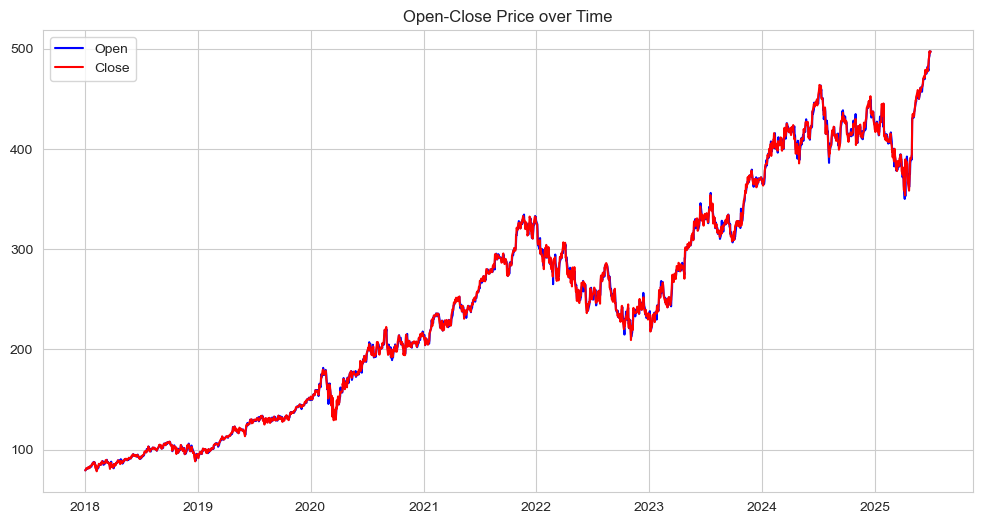

In [7]:
# Initial Data Visualization
# Plot 1 - Open and Close Prices of time
plt.figure(figsize=(12,6))
plt.plot(data['date'], data['open'], label="Open",color="blue")
plt.plot(data['date'], data['close'], label="Close",color="red")
plt.title("Open-Close Price over Time")
plt.legend()
plt.show()

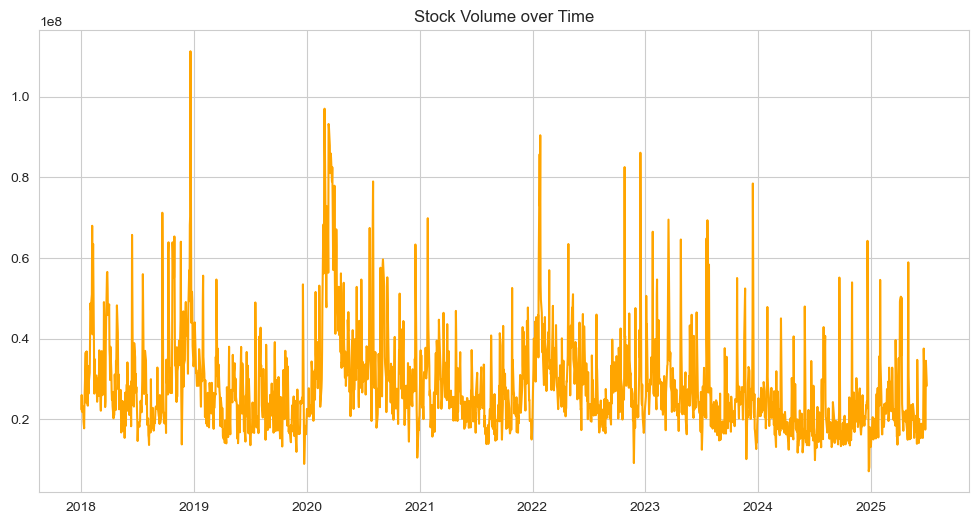

In [8]:
# Plot 2 - Trading Volume (check for outliers)
plt.figure(figsize=(12,6))
plt.plot(data['date'],data['volume'],label="Volume",color="orange")
plt.title("Stock Volume over Time")
plt.show()



In [9]:
# Drop non-numeric columns
numeric_data = data.select_dtypes(include=["int64","float64"])

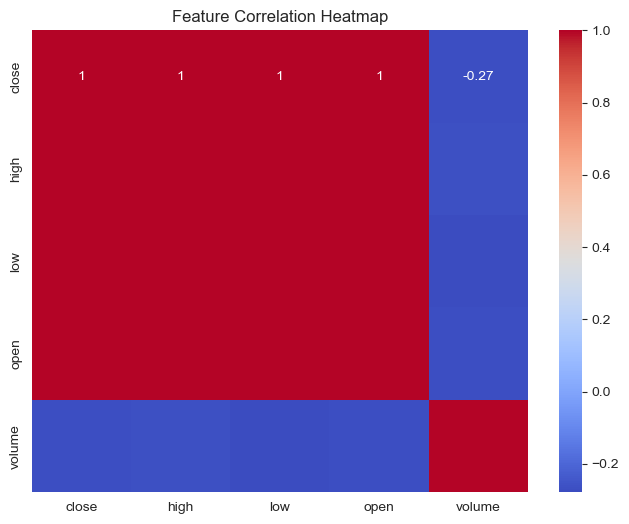

In [10]:
# Plot 3 - Check for correlation between features
plt.figure(figsize=(8,6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [11]:
# Convert the Data into Date time then create a date filter
data['date'] = pd.to_datetime(data['date'])

In [12]:
prediction = data.loc[
    (data['date'] > datetime(2018,1,1)) &
    (data['date'] < datetime(2025,1,1))
]

Text(0.5, 1.0, 'Price over time')

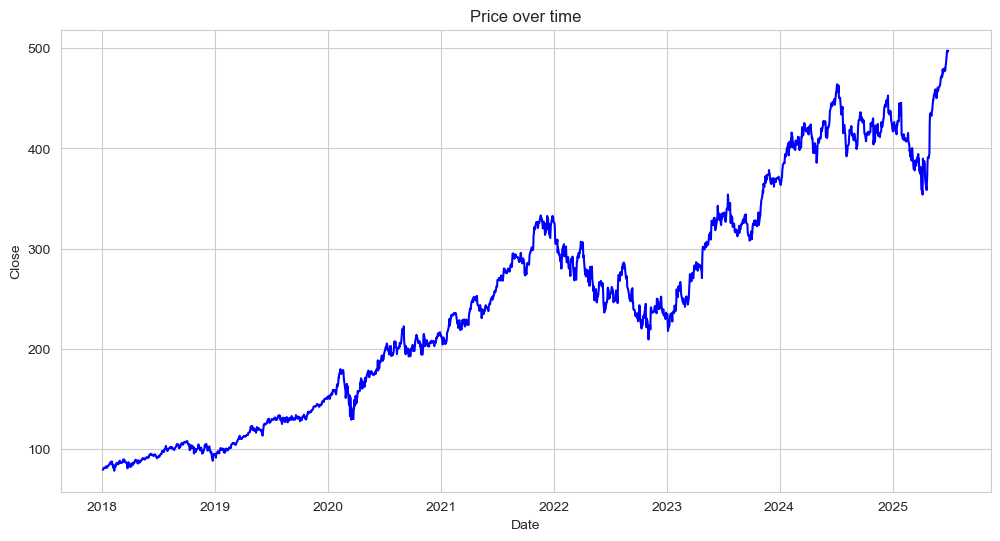

In [13]:
plt.figure(figsize=(12,6))
plt.plot(data['date'], data['close'],color="blue")
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Price over time")

In [14]:
# Prepare for the LSTM Model (Sequential)
stock_close = data.filter(["close"])
dataset = stock_close.values #convert to numpy array
training_data_len = int(np.ceil(len(dataset) * 0.95))


In [15]:
# Preprocessing Stages
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)


In [16]:
training_data = scaled_data[:training_data_len] #95% of all out data

X_train, y_train = [], []

In [17]:
# Create a sliding window for our stock (60 days)
for i in range(60, len(training_data)):
    X_train.append(training_data[i-60:i, 0])
    y_train.append(training_data[i,0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


In [18]:
# Build the Model
model = keras.models.Sequential()

# First Layer
model.add(keras.layers.LSTM(64, return_sequences=True, input_shape=(X_train.shape[1],1)))

# Second Layer
model.add(keras.layers.LSTM(64, return_sequences=False))

# 3rd Layer (Dense)
model.add(keras.layers.Dense(128, activation="relu"))

# 4th Layer (Dropout)
model.add(keras.layers.Dropout(0.5))

# Final Output Layer
model.add(keras.layers.Dense(1))

model.summary()
model.compile(optimizer="adam",
              loss="mae",
              metrics=[keras.metrics.RootMeanSquaredError()])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 64)            16896     
                                                                 
 lstm_1 (LSTM)               (None, 64)                33024     
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 58,369
Trainable params: 58,369
Non-trainable params: 0
_________________________________________________________________


In [19]:
training = model.fit(X_train, y_train, epochs=20,verbose=1, batch_size=32)

Epoch 1/20
55/55 [==============================] - 6s 26ms/step - loss: 0.2071 - root_mean_squared_error: 0.3212
Epoch 2/20
55/55 [==============================] - 1s 26ms/step - loss: 0.1344 - root_mean_squared_error: 0.1828
Epoch 3/20
55/55 [==============================] - 2s 28ms/step - loss: 0.1272 - root_mean_squared_error: 0.1739
Epoch 4/20
55/55 [==============================] - 1s 26ms/step - loss: 0.1219 - root_mean_squared_error: 0.1656
Epoch 5/20
55/55 [==============================] - 1s 26ms/step - loss: 0.1145 - root_mean_squared_error: 0.1542
Epoch 6/20
55/55 [==============================] - 1s 26ms/step - loss: 0.1089 - root_mean_squared_error: 0.1500
Epoch 7/20
55/55 [==============================] - 1s 26ms/step - loss: 0.1107 - root_mean_squared_error: 0.1494
Epoch 8/20
55/55 [==============================] - 1s 26ms/step - loss: 0.1053 - root_mean_squared_error: 0.1444
Epoch 9/20
55/55 [==============================] - 1s 27ms/step - loss: 0.1173 - root_m

In [20]:
# Prep the test data
test_data = scaled_data[training_data_len - 60:]
X_test, y_test = [], dataset[training_data_len:]


for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1 ))


In [21]:
model.predict(X_test)[0]

3/3 [==============================] - 1s 10ms/step


array([1.3876642], dtype=float32)

In [22]:
# Make a Prediction
predictions = model.predict(X_test)

3/3 [==============================] - 0s 10ms/step


In [23]:
predictions = scaler.inverse_transform(predictions)

In [24]:
# Plotting data
train = data[:training_data_len]
test =  data[training_data_len:]

test = test.copy()

test['Predictions'] = predictions

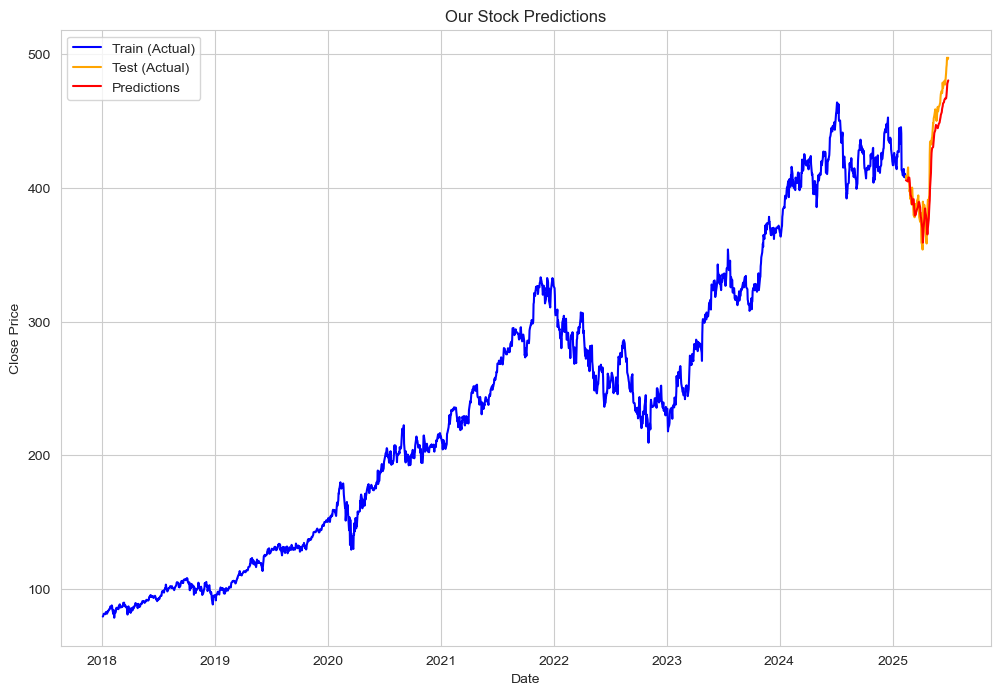

In [25]:
plt.figure(figsize=(12,8))
plt.plot(train['date'], train['close'], label="Train (Actual)", color='blue')
plt.plot(test['date'], test['close'], label="Test (Actual)", color='orange')
plt.plot(test['date'], test['Predictions'], label="Predictions", color='red')
plt.title("Our Stock Predictions")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

In [26]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error

rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)
mape = mean_absolute_percentage_error(y_test, predictions)

print(f"RMSE: {rmse}, R²: {r2}, MAPE: {mape}")

RMSE: 13.152649633980552, R²: 0.8970896570520848, MAPE: 0.02598238363329606


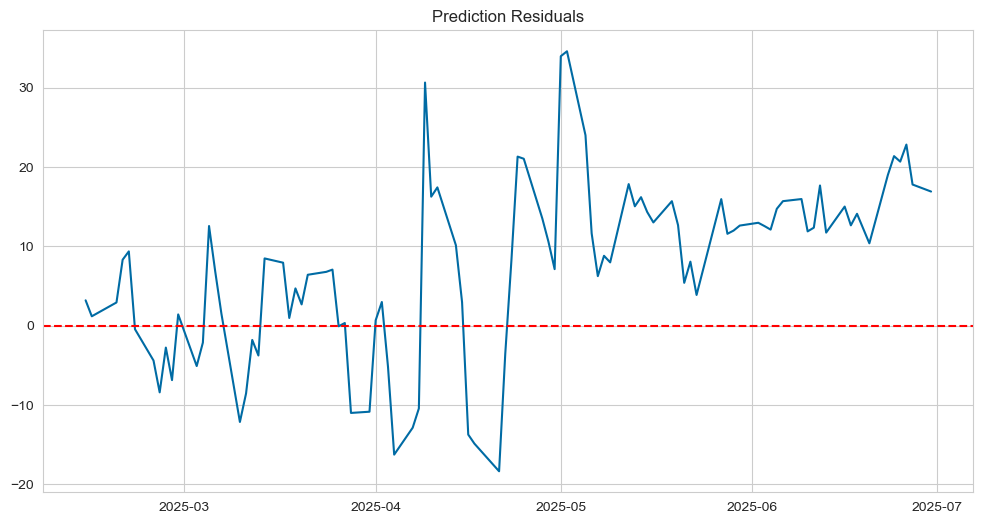

In [27]:
residuals = y_test.flatten() - predictions.flatten()

plt.figure(figsize=(12,6))
plt.plot(test['date'], residuals)
plt.title("Prediction Residuals")
plt.axhline(0, color='red', linestyle='--')
plt.show()


Forecast for next 30 days

In [28]:
# Parameters
future_days = 30  # how many days you want to forecast
window_size = 60  # your LSTM window size

# Get the last 60 days from scaled data
last_60_days = scaled_data[-window_size:]
forecast_input = last_60_days.reshape(1, window_size, 1)

# Store predictions
future_predictions = []

for _ in range(future_days):
    # Predict the next day
    prediction = model.predict(forecast_input, verbose=0)
    future_predictions.append(prediction[0][0])  # store predicted value
# Reshape the prediction to match input shape: (1, 1, 1)
next_input = np.reshape(prediction, (1, 1, 1))

# Append to input window (remove first time step, add new one)
forecast_input = np.append(forecast_input[:, 1:, :], next_input, axis=1)

# Inverse scale the predictions to get actual prices
future_predictions = np.array(future_predictions).reshape(-1, 1)
future_predictions_actual = scaler.inverse_transform(future_predictions)


In [29]:
last_date = data['date'].iloc[-1]
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_days)


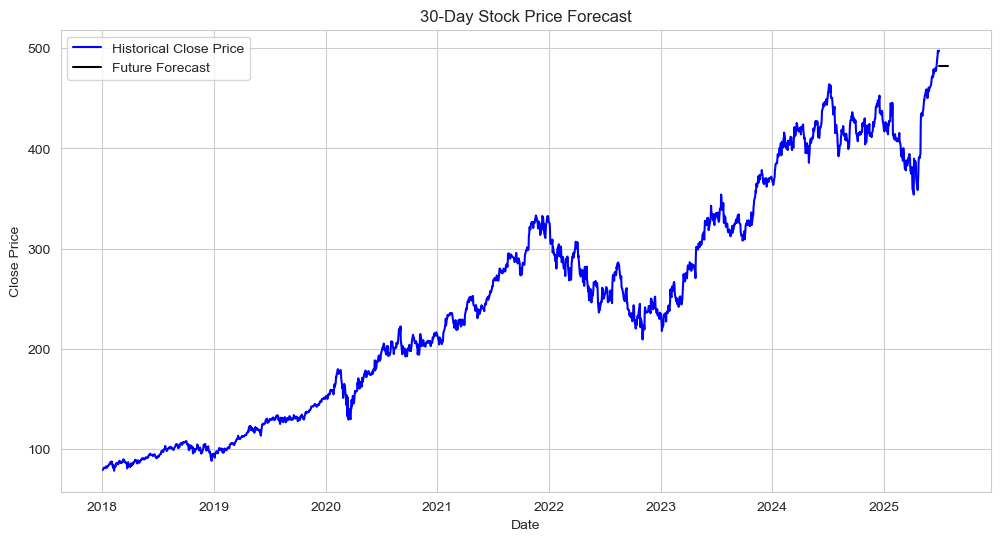

In [30]:
plt.figure(figsize=(12,6))
plt.plot(data['date'], data['close'], label="Historical Close Price", color='blue')
plt.plot(future_dates, future_predictions_actual, label="Future Forecast", color='black')
plt.title(f"{future_days}-Day Stock Price Forecast")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()


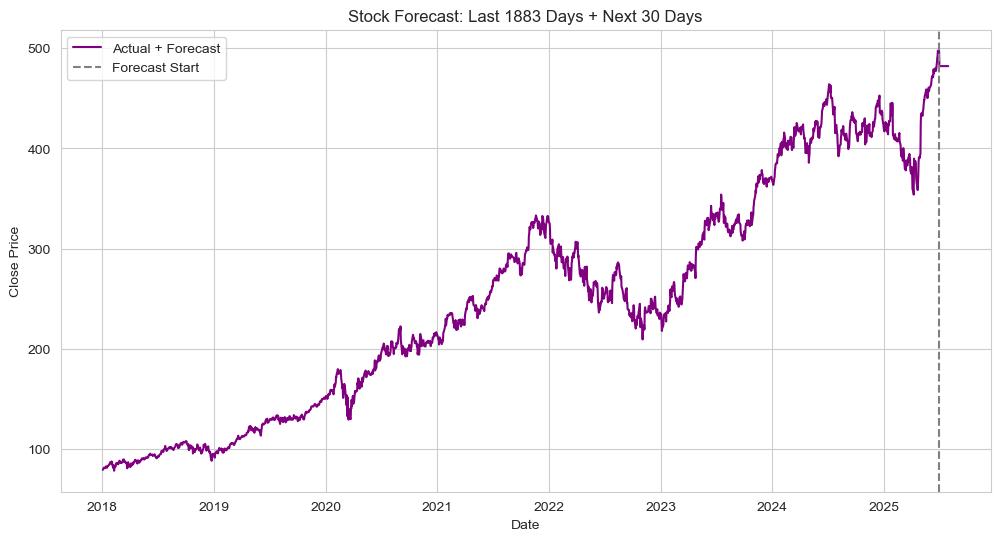

In [31]:
combined_dates = pd.concat([data['date'], pd.Series(future_dates)], ignore_index=True)
combined_prices = np.concatenate([data['close'].values, future_predictions_actual.flatten()])

plt.figure(figsize=(12,6))
plt.plot(combined_dates, combined_prices, label="Actual + Forecast", color='purple')
plt.axvline(x=data['date'].iloc[-1], color='gray', linestyle='--', label="Forecast Start")
plt.title(f"Stock Forecast: Last {len(data)} Days + Next {future_days} Days")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()
